In [149]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from collections import Counter
from itertools import repeat, chain

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [19]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [249]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [26]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [27]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [61]:
sel = [Measurement.date, func.sum(Measurement.prcp)]

In [244]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

rainy_days = session.query(*sel).filter(func.strftime("%Y/%m", Measurement.date) >= "2016/08").group_by(Measurement.prcp).order_by(Measurement.date).all()
rainy_days

[('2016-08-01', 2515.0),
 ('2016-08-01', 73.0),
 ('2016-08-01', 76.0),
 ('2016-08-01', 76.0),
 ('2016-08-02', 4549.0),
 ('2016-08-02', 1350.0),
 ('2016-08-02', 439.0),
 ('2016-08-02', 224.0),
 ('2016-08-02', 72.0),
 ('2016-08-03', 68925.0),
 ('2016-08-04', 3619.0),
 ('2016-08-04', 294.0),
 ('2016-08-04', 149.0),
 ('2016-08-05', 8053.0),
 ('2016-08-07', 1354.0),
 ('2016-08-07', 295.0),
 ('2016-08-07', 229.0),
 ('2016-08-07', 148.0),
 ('2016-08-08', 9106.0),
 ('2016-08-08', 598.0),
 ('2016-08-14', 1209.0),
 ('2016-08-14', 145.0),
 ('2016-08-16', 2490.0),
 ('2016-08-16', 142.0),
 ('2016-08-21', 2399.0),
 ('2016-08-22', 844.0),
 ('2016-08-22', 154.0),
 ('2016-08-22', 147.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 145.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 153.0),
 ('2016-08-24', 80.0),
 ('2016-08-28', 71.0),
 ('2016-08-31', 1849.0),
 ('2016-08-31', 76.0),
 ('2016-09-04', 5972.0),
 ('2016-09-04', 158.0),
 ('2016-09-05', 16953.0),
 ('2016-09-05', 1868.0),
 ('2016-09-07', 216.0),
 ('2016-

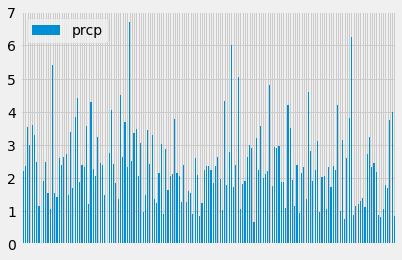

In [86]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(rainy_days, columns=['date', 'prcp'])
df.set_index('date', inplace=False)
plot = df.plot.bar()
plt.setp(plot.get_xticklabels(), visible=False)
plt.show()

In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,165.000000
mean,2.380970
std,1.130976
min,0.000000
25%,1.560000
50%,2.250000
75%,2.920000
max,6.700000


In [193]:
session.query(Measurement.station, Station.station).limit(200).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [227]:
M_stations = session.query(Measurement).limit(100000).all()
S_stations = session.query(Station).limit(100000).all()
M_list = []
S_list = []

In [230]:
for record in M_stations:
    (Measurement) = record
    M_list.append(Measurement.station)

In [231]:
for record in S_stations:
    (Station) = record
    S_list.append(Station.station)

In [232]:
full_list = M_list + S_list

In [233]:
# Design a query to show how many stations are available in this dataset?
len(set(full_list))

9

In [281]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active = []

mostcommon = Counter(full_list)
for i,j in mostcommon.most_common(100):
    print(i,j)

USC00519281 2773
USC00519397 2725
USC00513117 2710
USC00519523 2670
USC00516128 2613
USC00514830 2203
USC00511918 1980
USC00517948 1373
USC00518838 512


In [276]:
sel1 = [Measurement.date, func.max(Measurement.tobs)]
tobs = session.query(*sel1).filter(func.strftime("%Y/%m", Measurement.date) >= "2016/08").group_by(Measurement.tobs).order_by(Measurement.date).all()

Text(0, 0.5, 'tobs')

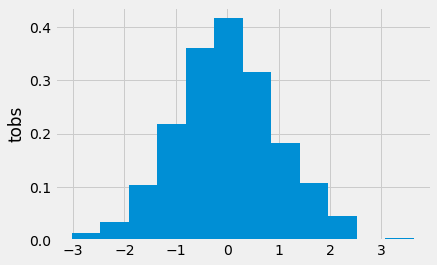

In [269]:
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=12)
plt.ylabel('tobs')

In [289]:
from flask import Flask, jsonify
app = Flask(__name__)

In [290]:
@app.route("/")
def routes():
    """Home Page
    All Available Routes"""
    return jsonify(full_list)

In [295]:
@app.route("/precipitation")
def raindays():
    """Home Page
    All Available Routes"""
    return jsonify(tobs)

In [297]:
@app.route("/stations")
def stations():
    """Home Page
    All Available Routes"""
    return jsonify(full_list)

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)